<a href="https://colab.research.google.com/github/PosgradoMNA/A01793027_Actividades_de_aprendizaje_Carlos_Daniel_Mendoza_Paz/blob/main/Actividad_Semanal_7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y Analitica de datos**
##**Data Analysis with Python**
##Alumno: Carlos Daniel Mendoza Paz
##Matricula: A01793027
###Fecha: 9 de Noviembre de 2022

-------------------------------------------------
##**Notebook 1. Regresión.**
-------------------------------------------------

#Ejercicio 1



---


**Ejercicio 1.** Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

* 1.1 Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
* 1.2 Regresión Lineal.
  * Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
* 1.3 Regresión Polinomial.
  * Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
* 1.4 Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
* 1.5 Finalmente grafica :
  * MAE (de los cuatro métodos)
  * R2 (de los cuatro métodos)
* 1.6 Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?



---



In [209]:
#Importamos librerías
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_validate,RepeatedKFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [210]:
#Importamos el dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')

In [211]:
#Hacemos un head
df1.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [212]:
#Hacemos un info para ver como se encuentra nuestro dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [213]:
#Hacemos un describe para ver los datos estadisticos del dataset
df1.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


Como se observa no tenemos ningun dato nullo, por lo que podemos proceder. y tenemos dos columnas con 100 filas de información.

##1.1 Divide los datos del costo de manufactura.

In [214]:
#Sacamos "x" y "y"
x_data = df1[["Number of Units"]]
y_data = df1["Manufacturing Cost"]

In [215]:
#Hacemos un shape para ver como quedó asignadas nuestras variable "x"
x_data.shape

(1000, 1)

In [216]:
#Hacemos un shape para ver como quedó asignadas nuestra variable "y"
y_data.shape

(1000,)

In [217]:
#Realizamos la partición de nuestros datos con 10% para prueba
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 101)

In [218]:
#Mostramos el tamaño de las particiones
print("Conjuntos de entrenamiento:")
print(f"X:{x_train.shape}")
print(f"Y:{y_train.shape}")
print("---------------------")
print("Conjuntos de prueba:")
print(f"X:{x_test.shape}")
print(f"Y:{y_test.shape}")

Conjuntos de entrenamiento:
X:(900, 1)
Y:(900,)
---------------------
Conjuntos de prueba:
X:(100, 1)
Y:(100,)


In [351]:
#Creamos nuestras funciónes para poder calcular nuestras métricas
#def mi_RMSE(y_real, y_pred):
    #result = np.sqrt(np.mean((y_real - y_pred) ** 2))
    #return result

def mi_MAE(y_real, y_pred):
    result = np.mean(np.abs(y_real - y_pred))
    return result

def mi_R2(y_real, y_pred):
    result = r2_score(y_real, y_pred)

    return result

##1.2 Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.




In [363]:
#Creamos una función de las funciones
def metricas_regresion(y_real, y_pred, name):
    tabla = pd.DataFrame(index = ['MAE', 'R2'],
                        data= [mi_MAE(y_real, y_pred), mi_R2(y_real, y_pred)], columns= [name])
    return tabla

In [353]:
#Hacemos una instancia de la regresión lineal
LR_model = LinearRegression(fit_intercept=True)


In [354]:
print(f"X_Train: {type(x_train)}")
print(f"X_Train: {x_train.shape}")
print(f"Y_Train: {type(y_train)}")
print(f"Y_Train: {y_train.shape}")


X_Train: <class 'pandas.core.frame.DataFrame'>
X_Train: (900, 1)
Y_Train: <class 'pandas.core.series.Series'>
Y_Train: (900,)


In [355]:
#Entrenamos el modelo con la regresión lineal y el conjunto de entrenamiento
LR_model.fit(x_train, y_train)

LinearRegression()

In [356]:
#Obtenemos las predicciónes
y_pred = LR_model.predict(x_test)

In [357]:
#Hacemos una función para graficar
def Grafica(y_fit):
  plt.scatter(x_data, y_data)

  order = np.argsort(x_test.values.ravel())
  x_order = x_test.values.ravel()[order]
  y_order = y_test.values.ravel()[order]
  y_fit_order = y_fit[order]

  plt.plot(x_order, y_fit_order, 'r-', linewidth=2, label='Predictions')
  plt.xlabel('$X$', fontsize=18)
  plt.ylabel('$y$', fontsize=18)
  plt.legend(loc='upper left',fontsize=14)

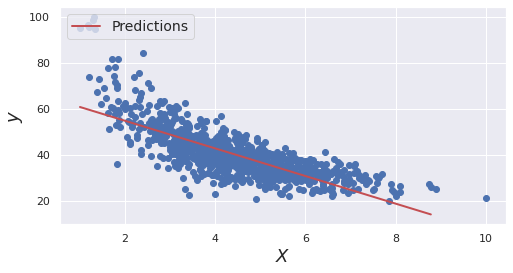

In [358]:
Grafica(y_pred)

In [359]:
#Sacamos la ecuación del modelo generado
LR_model.coef_,LR_model.intercept_

(array([-5.98882699]), 66.83650741226988)

The model estimates:

$\hat{y} = -5.98X + 66.83$

In [364]:
#Obtenemos el valor de nuestras métricas
metricas_regresion(y_test, y_pred, "Metricas")

,Metricas
MAE,5.013588
R2,0.611625


In [337]:
metricas = {
    "R2":"r2",
    "MAE":'neg_mean_absolute_error'
}

resultados = list()

In [341]:
#Guardamos los resultados en una lista para graficarlos posteriormente
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(LR_model,x_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)

##1.3 Regresión Polinomial.
Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [287]:
#Realizamos la regresión polinomial y entrenamos el modelo
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x_train)

In [288]:
print(f"X_Poly Type: {type(x_poly)}")
print(f"X_Poly Shape: {x_poly.shape}")
print(f"Y_Train Type: {type(y_train)}")
print(f"Y_Train Shape: {y_train.shape}")

X_Poly Type: <class 'numpy.ndarray'>
X_Poly Shape: (900, 2)
Y_Train Type: <class 'pandas.core.series.Series'>
Y_Train Shape: (900,)


In [289]:
resultados = list()
metricas = {
    "R2":"r2",
    "MAE":'neg_mean_absolute_error'
}

In [290]:
#Entrenamos el modelo
#Sacamos las predicciónes
RL_poly = LinearRegression(fit_intercept=True)

kfold = RepeatedKFold(n_splits=5, n_repeats=3)

scores = cross_validate(RL_poly,x_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)
RL_poly.fit(x_poly, y_train)


X_poly = poly_features.transform(x_test)
y_Poly_Pred = RL_poly.predict(X_poly)


In [292]:
#Sacamos la ecuación del modelo
RL_poly.coef_, RL_poly.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

The model estimates:

$\hat{y} =  -16.40X + 1.13X^2 + 88.80$

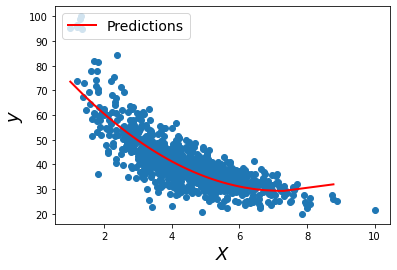

In [293]:
Grafica(y_Poly_Pred)

##1.4 Realiza la regresión con Ridge y Lasso. 
Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

###Ridge

In [294]:
#Hacemos un pipeline para el modelo ridge
ridge_model = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10, solver='cholesky', random_state=10))
])

In [295]:
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(ridge_model ,x_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)

In [296]:
#Entrenamos el modelo
ridge_model.fit(x_train, y_train)

Pipeline(steps=[('poli_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10, random_state=10, solver='cholesky'))])

In [297]:
#Sacamos las predicciones
y_fit_ridge =ridge_model.predict(x_test)

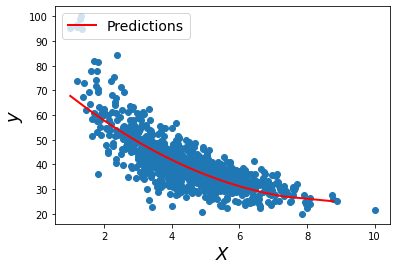

In [298]:
#Graficamos las predicciónes
Grafica(y_fit_ridge)

In [300]:
#Sacamos la ecuación del modelo
ridge_model["ridge"].coef_, ridge_model["ridge"].intercept_

(array([-15.81291035,   8.21659784]), 40.04406809368893)

The model estimates:

$\hat{y} =  -15.81X + 8.21X^2 + 40$

In [365]:
#Obtenemos el valor de nuestras métricas
metricas_regresion(y_test, y_fit_ridge, "Metricas")


,Metricas
MAE,4.495297
R2,0.702119


###Lasso

In [307]:
#Hacemos un pipeline
lasso_model = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=10, random_state=10))
])

In [308]:
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(lasso_model ,x_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)

In [309]:
#Entrenamos el modelo
lasso_model.fit(x_train, y_train)

Pipeline(steps=[('poli_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=10))])

In [310]:
#Sacamos las predicciónes
y_fit_lasso = lasso_model.predict(x_test)

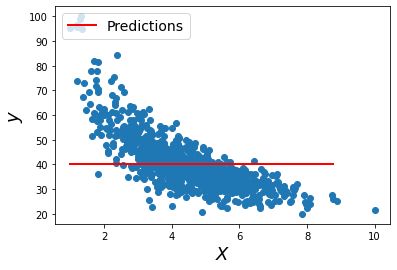

In [311]:
#Graficamos las predicciónes
Grafica(y_fit_lasso)

In [314]:
#Sacamos la ecuación del modelo
lasso_model["lasso"].coef_, lasso_model["lasso"].intercept_

(array([-0., -0.]), 40.044068093688885)

The model estimates:

$\hat{y} =  -0X + 0X^2 + 40$

In [366]:
#Sacamos nuestras metricas
metricas_regresion(y_test, y_fit_ridge, "Metricas")

,Metricas
MAE,4.495297
R2,0.702119


##1.5 Finalmente grafica
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)

In [348]:
#Creamos una función para graficar
def Grafica_metricas(metrica):
  sns.set(rc={'figure.figsize':(8,4)})

  R2_list = list()
  for i in range(len(resultados)):
    r2 = resultados[i][metrica]
    R2_list.append(r2)

  plt.boxplot(R2_list, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
  plt.show()


<h3> R2

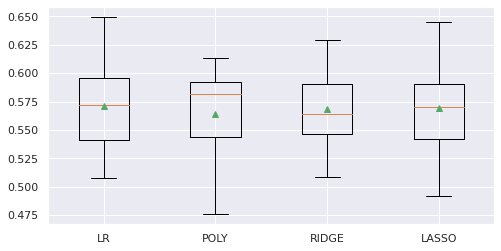

In [349]:
Grafica_metricas("test_R2")

<h3> MAE

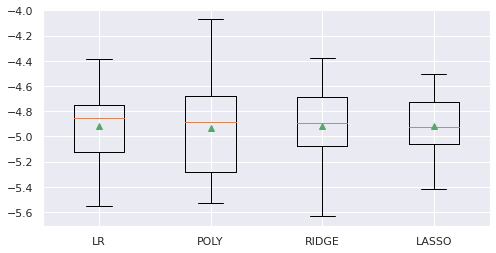

In [350]:
Grafica_metricas("test_MAE")

##1.6 Explica tus resultados, que método conviene más a la empresa.
¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

**<h4>Conclusiónes**


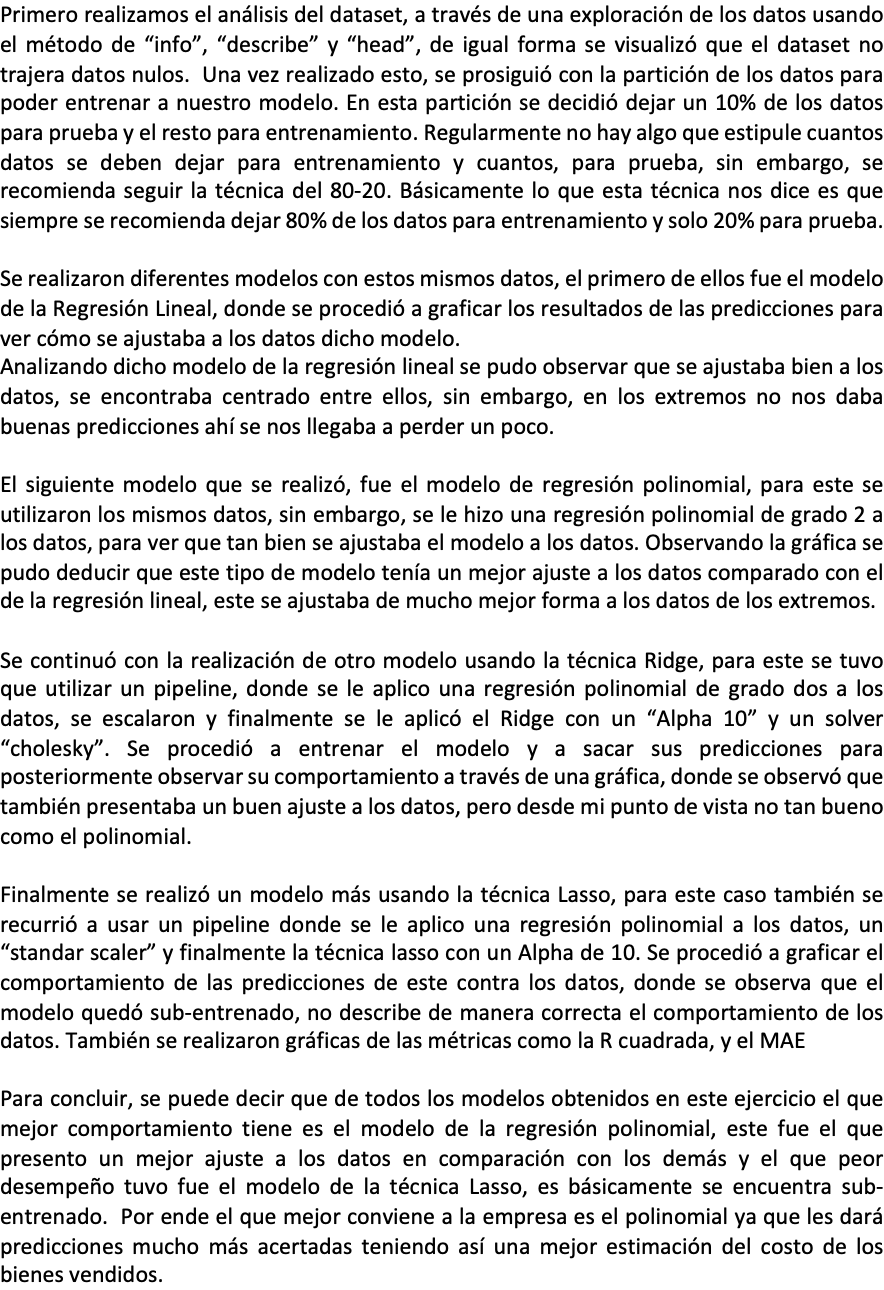

#Ejercicio 2

Ejercicio 2. Regresión múltiple.

Encuentra el mejor regresor para los datos de las casas:

* Divide los datos.
  * Utiliza la función train_test_split (ya esta en el notebook).
* Regresión Múltiple Lineal.
  * Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.
* Regresión Múltiple Polinomial.
  * Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.
* Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.
* Finalmente gráfica :
  * MAE (de los cuatro métodos)
  * R2 (de los cuatro métodos)

Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
Agrega las conclusiones

In [387]:
#Leemos el dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [388]:
#Hacemos una limpieza de los datos
df2.drop('id',axis=1,inplace=True)
df2.drop('zipcode',axis=1,inplace=True)
df2.drop('lat',axis=1,inplace=True)
df2.drop('long',axis=1,inplace=True)
df2.drop('date', axis=1, inplace=True)

In [399]:
#Sacamos a "x y "y"
x2_data = df2.drop(["price"],axis=1)
y2_data = df2['price']

In [400]:
print(f"X_data Type: {type(x2_data)}")
print(f"x_data Shape: {x2_data.shape}")
print(f"Y_data Type: {type(y2_data)}")
print(f"Y_data Shape: {y2_data.shape}")

X_data Type: <class 'pandas.core.frame.DataFrame'>
x_data Shape: (21613, 15)
Y_data Type: <class 'pandas.core.series.Series'>
Y_data Shape: (21613,)


In [404]:
#Dividimos nuestro conjunto de datos

x2_train, x2_test, y2_train, y2_test = train_test_split(x2_data, y2_data, train_size=0.80, random_state=10)

# Sacamos las metricas a utilizar
metricas = {
    "R2":"r2",
    "MAE":'neg_mean_absolute_error'
}

resultados = list()

##Regresión Lineal Multiple

In [414]:
#Sacamos la regresión lineal multiple
RLM = LinearRegression(fit_intercept=True)

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(RLM,x2_train,y2_train,scoring=metricas,cv=kfold)
resultados.append(scores)
RLM.fit(x2_train, y2_train)
y2_pred = RLM.predict(x2_test)

In [415]:
#Obtenemos los valores de la ecuación
RLM.coef_

array([-3.76683274e+04,  4.27364791e+04,  1.02300342e+02, -7.69755024e-02,
        2.31889484e+04,  5.51599951e+05,  4.41166108e+04,  2.09451037e+04,
        1.24305790e+05,  4.91681504e+01,  5.31321920e+01, -3.46978539e+03,
        4.68331247e+00,  2.99056709e+01, -4.58858771e-01])

In [416]:
RLM.intercept_

5972932.920183142

Sacamos la ecuación

The model estimates:

$\hat{y} = -3.76x1 + 4.27x2 + 1.0x3 - 7.6x4 + 2.31x5 + 5.52x6 + 4.41x7 + 2.0x8 + 1.24x9 + 4.9x10 + 5.3x11 -3.4x12 + 4.6x13 +2.9x14 -4.5x15 + 66.83$

In [417]:
#Sacamos los errores
print('Error medio Absoluto (MAE):', mean_absolute_error(y2_test, y2_pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y2_test, y2_pred)))
print('R2_score', r2_score(y2_test, y2_pred))

Error medio Absoluto (MAE): 139557.22435871416
Root Mean Squared Error : 224280.2878492429
R2_score 0.655690716581879


#Regresion Polinomial multiple


In [422]:
#Hacemos la regresión polinomial multiple
poly_features = PolynomialFeatures(degree=2, include_bias=False)

x2_poly = poly_features.fit_transform(x2_train)
PLR = LinearRegression(fit_intercept=True)

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(poly_lr ,x2_train,y2_train,scoring=metricas,cv=kfold)
resultados.append(scores)



In [423]:
#Entrenamos el modelo
PLR.fit(x2_poly,y2_train)
x2_poly_transform = poly_features.transform(x2_test)


In [424]:
#Sacamos las predicciónes
y2_pred_poly = PLR.predict(x2_poly_transform)


In [425]:
#Se obtienen los coeficientes
PLR.coef_

array([ 1.08105215e+06, -1.02221957e+06, -1.01827869e+03, -3.63059434e+01,
       -2.11606976e+06, -3.98422047e+06, -3.12993867e+05,  5.30011189e+05,
        1.27469467e+06, -4.95704771e+02, -2.67320857e+02, -7.27527747e+04,
       -3.38519349e+03,  4.03130255e+03, -2.14745422e+01,  8.62578909e+02,
        3.73270565e+03, -1.43758738e+01,  2.50428132e-01,  1.70733704e+04,
       -1.39743510e+03,  3.00863534e+02, -2.44882404e+03, -2.93344801e+03,
       -3.73308824e+00, -1.23352901e+01, -5.58205558e+02, -6.70675743e+00,
        1.85973107e+01,  6.09189442e-02, -1.11567570e+04,  1.93913879e+01,
       -5.52683965e-01, -2.10724190e+04,  6.55085208e+04,  2.66266651e+03,
       -4.00515058e+03,  1.46476016e+04,  1.00098064e+01,  9.77850349e+00,
        5.04864921e+02, -2.11325574e+01, -1.69104967e+01,  4.61692289e-01,
        1.51860305e+00,  1.07165989e+01, -1.70106330e+01,  8.40224936e+01,
       -5.97597995e+00,  8.29189236e+00,  2.72373361e+01, -7.26580676e-01,
       -1.52941126e+00,  

In [427]:
#Se obtienen las intersecciónes
PLR.intercept_

67060593.34670207

Esos valores son los que formarían la ecuación pero por cuestiones de espacio no los coloco en la ecuación


In [428]:
#Sacamos los las metricas
order = np.argsort(x2_test.values.ravel())
x_order = x2_test.values.ravel()[order]
y_order = y_test.values.ravel()
y_pred_order =y2_pred_poly
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_pred_order))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_pred_order)))
print('R2_score', r2_score(y_order,y_pred_order))

Error medio Absoluto (MAE): 124347.09418373529
Root Mean Squared Error : 192576.30094959823
R2_score 0.7461529015147186


##Ridge

In [431]:
#Hacemos un pipeline
ridge_model = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10, solver='cholesky', random_state=10))
])


In [432]:
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(ridge_model ,x2_train,y2_train,scoring=metricas,cv=kfold)
resultados.append(scores)

In [433]:
#Entrenamos el modelo
ridge_model.fit(x2_train, y2_train)

Pipeline(steps=[('poli_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10, random_state=10, solver='cholesky'))])

In [434]:
#Sacamos las predicciónes
y2_pred_ridge = ridge_model.predict(x2_test)

In [436]:
#Sacamos los valores de los coeficientes
ridge_model["ridge"].coef_

array([ 6.45140493e+04,  1.55918051e+04, -4.54028008e+03, -1.00986686e+05,
       -2.87695912e+04, -3.04488078e+04, -2.72195569e+04,  4.05170888e+04,
        7.56899691e+04, -7.26739443e+03,  4.15711442e+03, -8.45994981e+04,
       -6.06046444e+04,  1.19363837e+05,  8.57535605e+03,  9.10411467e+03,
       -2.10103461e+04, -3.53641536e+04,  1.56200114e+04,  2.93588922e+04,
        2.20175399e+02,  2.72639524e+03,  1.20266618e+04, -7.05723490e+03,
       -3.08953613e+04, -2.32151915e+04, -9.30339840e+04,  5.22488749e+03,
        5.46067304e+04,  7.67131077e+03, -1.18853463e+04,  5.82843863e+04,
       -4.40513775e+04, -3.19154020e+04,  2.24595376e+04,  6.10477606e+03,
       -4.70221202e+04,  8.59886755e+04,  6.31200092e+04,  1.30296480e+04,
        2.65226234e+04, -2.58782694e+04, -8.15253955e+04,  3.45430069e+04,
        1.78988071e+04, -3.94909818e+04, -4.30326157e+04,  1.81789510e+04,
       -4.60937345e+03,  7.46661203e+03,  1.80971839e+05,  2.68645666e+04,
       -1.51576276e+04, -

In [437]:
#Sacamos los valores de la intersección
ridge_model["ridge"].intercept_


540243.2680161947

Esos valores son los que formarían la ecuación pero por cuestiones de espacio no los coloco en la ecuación


In [439]:
order = np.argsort(x2_test.values.ravel())
x_order = x2_test.values.ravel()[order]
y_order = y2_test.values.ravel()
y_fit_order = y2_pred_ridge

In [440]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_fit_order))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_fit_order)))
print('R2_score', r2_score(y_order,y_fit_order))

Error medio Absoluto (MAE): 125878.17822092563
Root Mean Squared Error : 195200.0212048077
R2_score 0.7391887960699358


##Lasso

In [443]:
#Hacemos un pipeline
lasso_model2 = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=10, random_state=10))
])

In [444]:
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(lasso_model2 ,x2_train,y2_train,scoring=metricas,cv=kfold)
resultados.append(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+14, tolerance: 1.813e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.904e+14, tolerance: 1.772e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [445]:
#Entrenamos el modelo
lasso_model2.fit(x2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+14, tolerance: 2.281e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Pipeline(steps=[('poli_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=10))])

In [446]:
#Sacamos las predicciónes
y_pred_lasso = lasso_model2.predict(x2_test)

In [447]:
#Obtenemos los valores de los coeficientes
lasso_model2["lasso"].coef_

array([ 7.95035403e+04,  1.09774008e+05,  5.12981975e+04, -1.05654280e+05,
       -3.91595478e+04, -9.05914599e+02,  5.45333588e+04,  4.21201912e+04,
        2.17270247e+05, -1.19543136e+05, -3.66437725e+04, -9.35689622e+04,
       -9.74112859e+04,  6.39187860e+04, -1.57438800e+03,  9.53195592e+03,
       -2.08927097e+04, -6.74373245e+04,  1.73627853e+04,  3.24343520e+04,
       -1.74795673e+02,  2.07674365e+03,  9.76558272e+03, -1.28479549e+04,
       -1.31642157e+04, -1.18333597e+04, -1.05235794e+05,  5.92832985e+03,
        6.51688110e+04,  6.97864499e+03, -1.22375300e+04,  1.51834147e+05,
       -4.76653248e+04, -3.65057309e+04,  2.25640621e+04,  8.38269018e+03,
       -5.17904934e+04,  1.16739761e+05, -8.41587532e+03, -1.72515956e+04,
       -7.50290604e+04, -2.75778168e+04, -1.07097666e+05,  3.86767002e+04,
        6.63336846e+04, -1.22379873e+04, -2.93927188e+04, -4.84548216e+03,
        7.50210842e+04, -2.61083172e+04,  2.68641243e+05, -2.29899993e+05,
       -3.36073285e+03, -

In [449]:
#Sacamos los valores de la intercepción
lasso_model2['lasso'].intercept_

540243.2680161947

Esos valores son los que formarían la ecuación pero por cuestiones de espacio no los coloco en la ecuación


In [451]:
order = np.argsort(x2_test.values.ravel())
x_order = x2_test.values.ravel()[order]
y_order = y2_test.values.ravel()
y_fit_order = y_pred_lasso

In [452]:
#Sacamos los errores
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_fit_order))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_fit_order)))
print('R2_score', r2_score(y_order,y_fit_order))

Error medio Absoluto (MAE): 125894.57620461189
Root Mean Squared Error : 195668.13765745916
R2_score 0.7379363739733451


##Graficas de las metricas

###R2

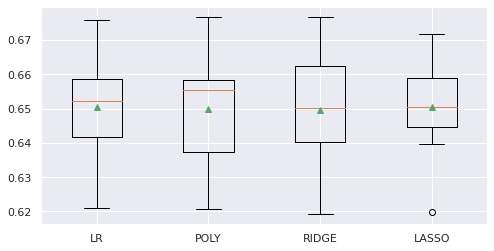

In [453]:
sns.set(rc={'figure.figsize':(8,4)})

R2list = list()
for i in range(len(resultados[0])):
  r2 = resultados[i]['test_R2']
  R2list.append(r2)

plt.boxplot(R2list, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
plt.show()

##MAE

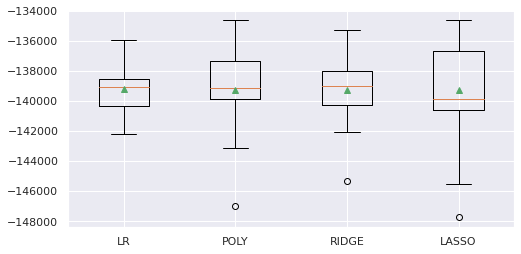

In [454]:
sns.set(rc={'figure.figsize':(8,4)})

MAElist = list()
for i in range(len(resultados[0])):
  mae = resultados[i]['test_MAE']
  MAElist.append(mae)

plt.boxplot(MAElist, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
plt.show() 

**Conclusiónes**

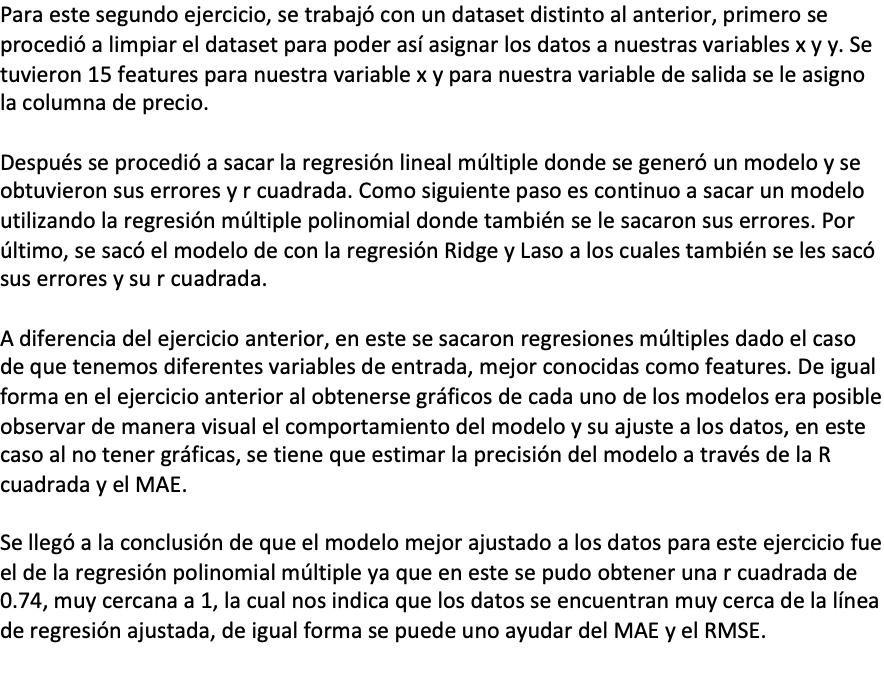



---

**<h1>FIN**

---